## # **Statewise Suicides in India** 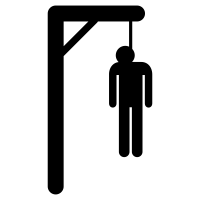

Data Overview:
Here's the classification of the variables into categorical, nominal, ordinal, and quantitative:

Categorical:

Year: Nominal
State: Nominal (names of states, no inherent order)
Type_code: Nominal (codes representing suicide types, no inherent order)
Type: Nominal (names of suicide types, no inherent order)
Gender: Nominal (categories without a natural order)
Age_group: Ordinal (categories with a natural order, but not numerical differences)

Total: Quantitative (numerical counts of suicides)

**Descriptive Objectives:**

Analyze trends in suicide rates over time across different states and demographic groups (age, gender).
Identify the most prevalent suicide types by state, year, and demographic group.
Map geographical patterns of suicide rates across states.
Explore seasonal variations in suicide rates.

**Risk Factor Identification:**

Investigate the association between social factors (e.g., unemployment, social isolation) and suicide risk.
Examine the connection between economic factors (e.g., poverty, income inequality) and suicide rates.
Analyze the correlation between mental health conditions (e.g., depression, anxiety) and suicide risk.
Identify potential risk factors specific to different demographic groups.
Prevention Strategy Evaluation:

Assess the effectiveness of existing suicide prevention programs in different states and populations.
Evaluate the impact of public awareness campaigns on suicide rates.
Compare the effectiveness of different suicide prevention approaches.
Identify gaps in existing prevention strategies and recommend potential improvements.

**Additional Objectives:**

Investigate the role of media portrayal of suicide in influencing suicide rates.
Analyze the impact of firearm access on suicide rates.
Explore the cultural and religious factors associated with suicide risk.**bold text**

In [ ]:
import pandas as pd
!pip install bar_chart_race
import bar_chart_race as bcr
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.plotting import figure, show
import seaborn as sns
from matplotlib.animation import FuncAnimation
!pip install bubbly
from bubbly.bubbly import bubbleplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5415 sha256=aa084e4f8c82d432d959c84d8407fda4040c9a6bbc496e8a9e38db8f91834d4b
  Stored in directory: /root/.cache/pip/wheels/dc/b4/ab/043c77f064dbbb38983593a3bed54363cc1910d0fb20ba6f66
Successfully built bubbly


In [ ]:
df1= pd.read_csv("Suicides in India 2001-2012.csv")
df1

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [ ]:
df2= df1.groupby('Year').sum().reset_index()
df2

<ipython-input-22-7b477d19301d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Year,Total
0,2001,976464
1,2002,993648
2,2003,997622
3,2004,1023137
4,2005,1025201
5,2006,1062991
6,2007,1103667
7,2008,1125082
8,2009,1144033
9,2010,1211322


In Order to Find yearly trend in suicides

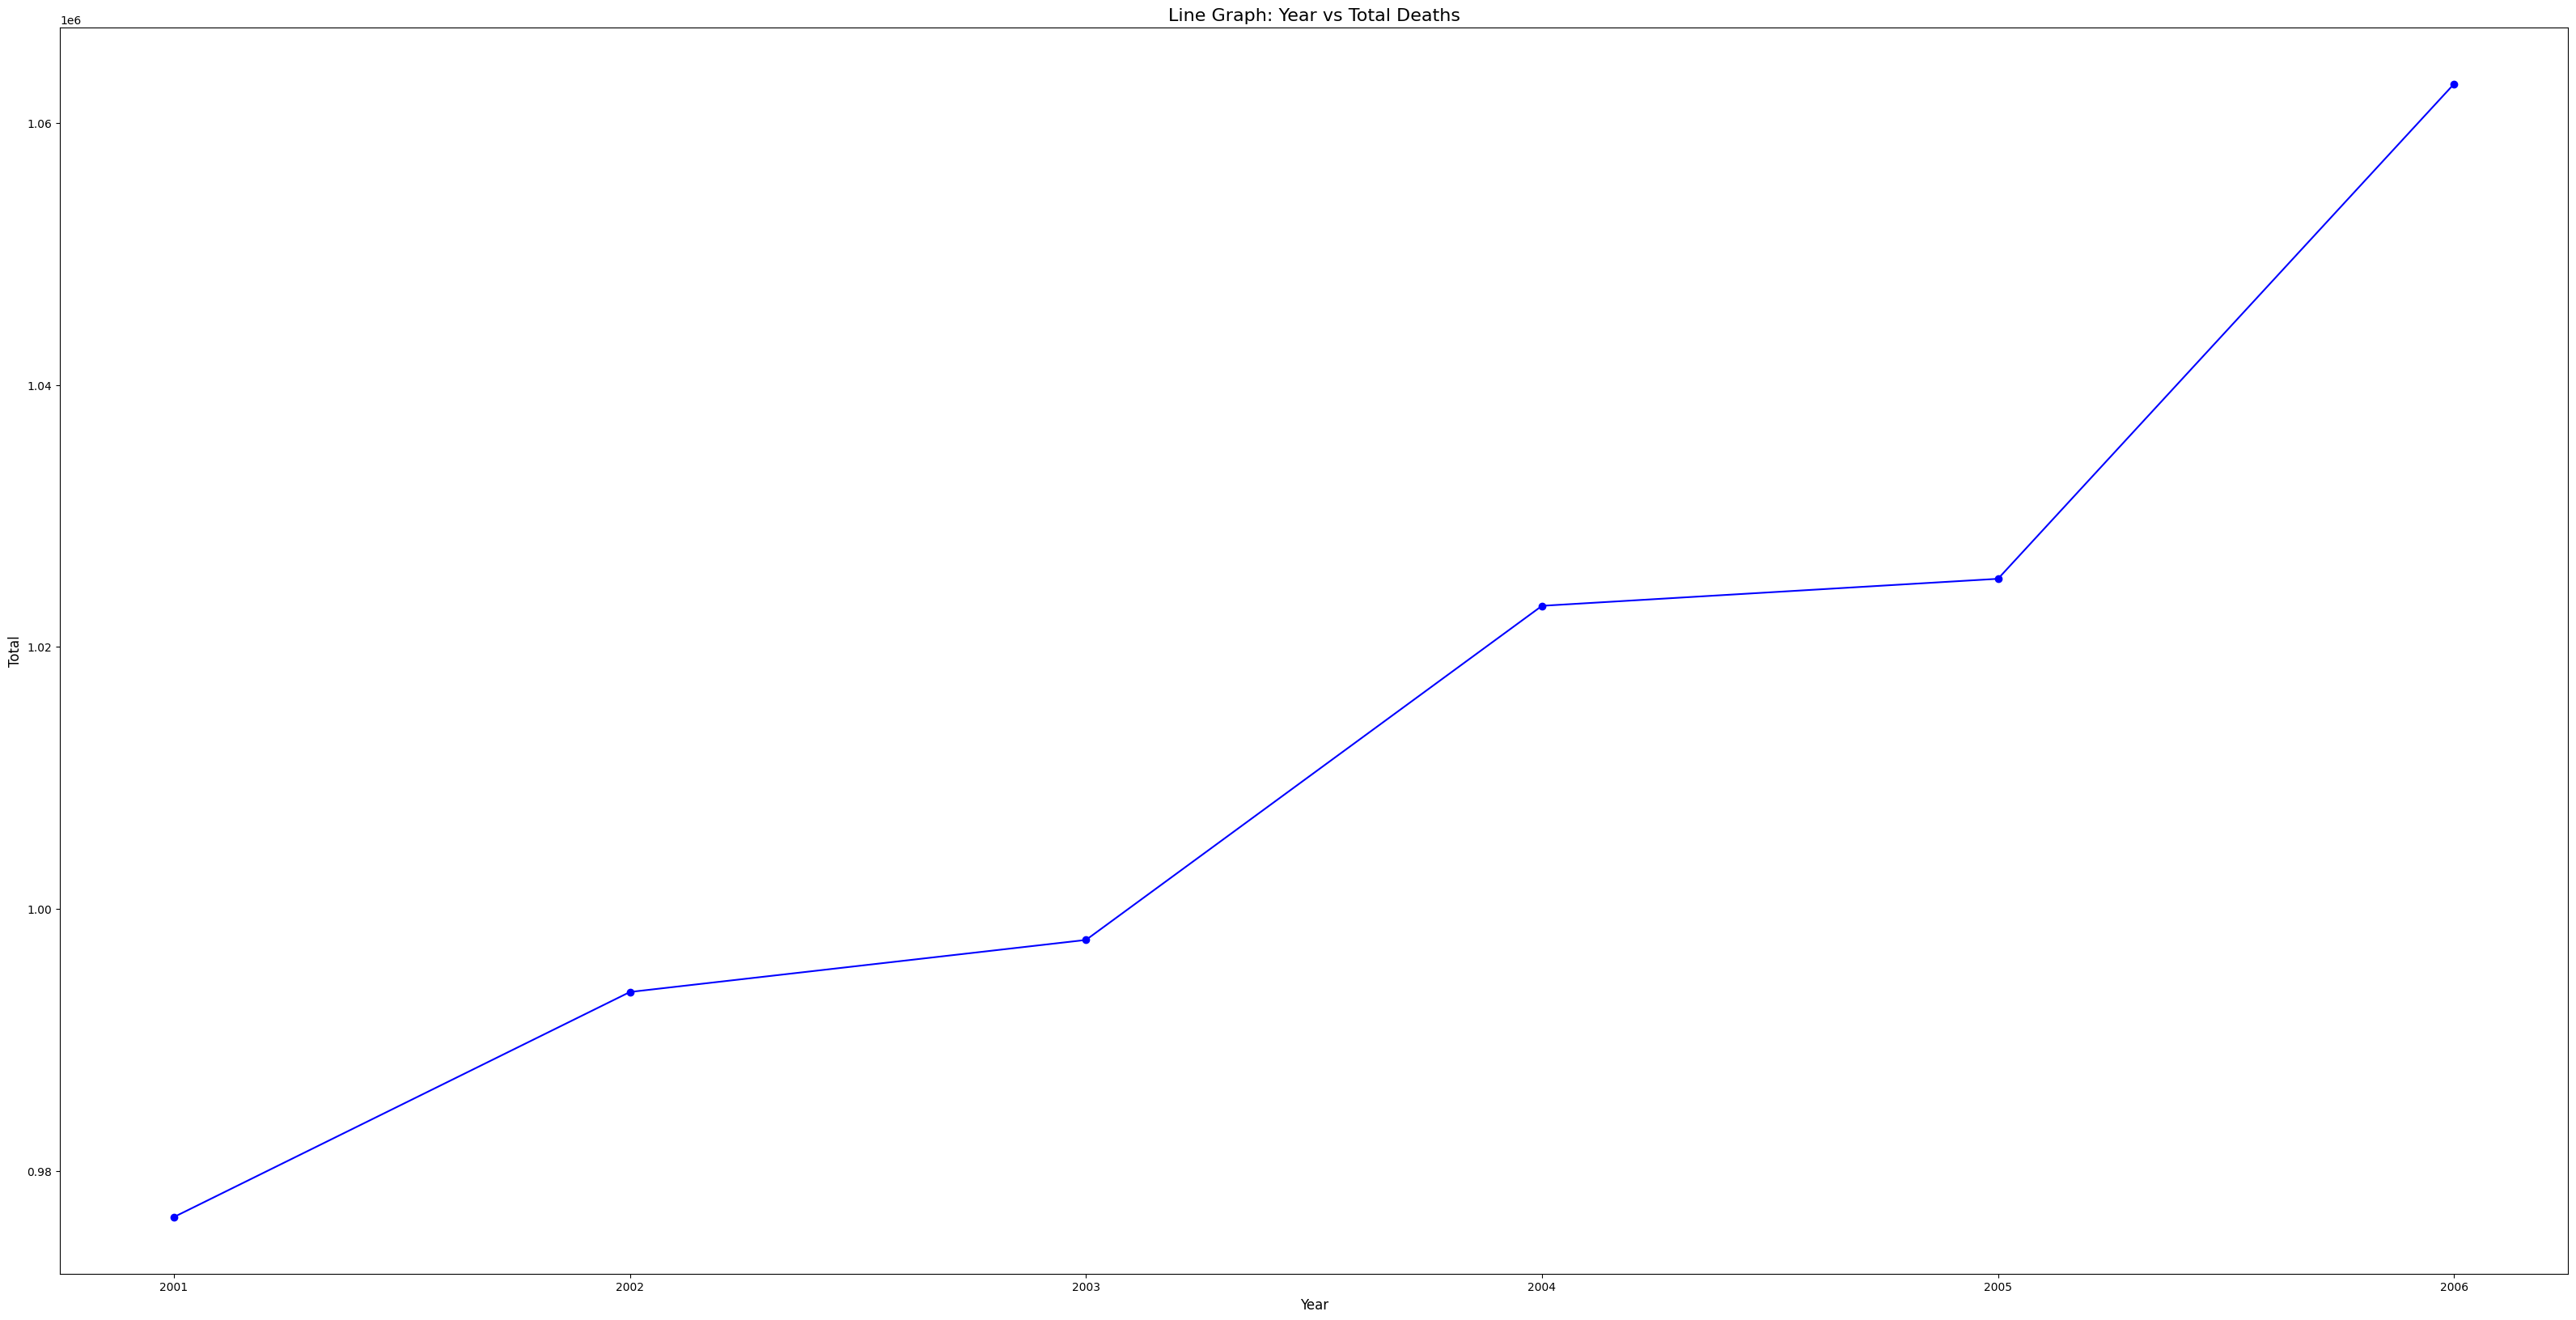

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from collections import deque
import time

# ... code to create or load your DataFrame df2 ...

# Group data by year and sum, ensuring 'Year' and 'Total' columns exist
line = df2.groupby('Year').sum().reset_index()  # Create line DataFrame

# Create figure and axis
fig, ax = plt.subplots(figsize=(40, 20))

# Initialize variables for looping
current_index = 0
max_index = len(line) - 1  # Use length of line DataFrame

Year = deque()  # Define the Year deque
Total = deque()  # Define the Total deque

while True:
    # Update deques with data for the current year
    Year.append(line["Year"].iloc[current_index])
    Total.append(line["Total"].iloc[current_index])

    # Update the plot
    ax.clear()  # Clear previous plot
    ax.plot(list(Year), list(Total), marker='o', linestyle='-', color='blue')

    plt.title('Line Graph: Year vs Total Deaths', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total', fontsize=12)

    # Display the updated plot
    display(plt.gcf())
    time.sleep(0.5)  # Adjust delay as needed
    clear_output(wait=True)

    # Increment index and loop back if necessary
    current_index += 1
    if current_index > max_index:
        current_index = 0
        Year.clear()  # Clear deques for the next cycle
        Total.clear()

There is an overall increase in deaths, there is a sharp increase after 2008 might be because of the crisis

Find the Gender Split in Suicides

In [ ]:
malefemale=df1.groupby(['Year','Gender']).sum().reset_index().pivot_table(values='Total', index='Year', columns='Gender', aggfunc='sum')
bcr.bar_chart_race(df=malefemale,filename=None,figsize=(3,5),title='Genderwise Suicides')


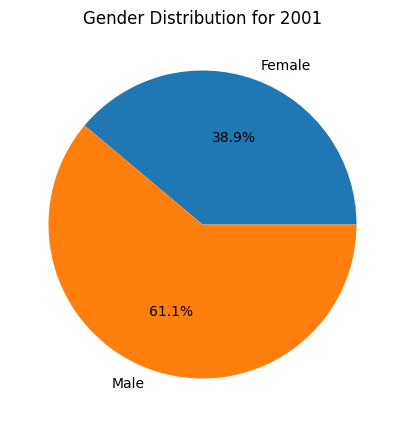

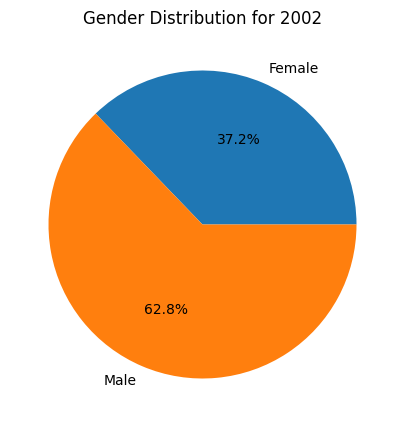

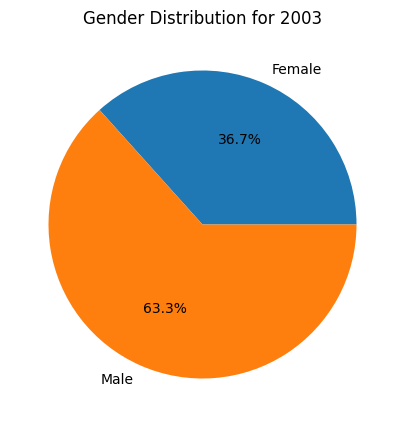

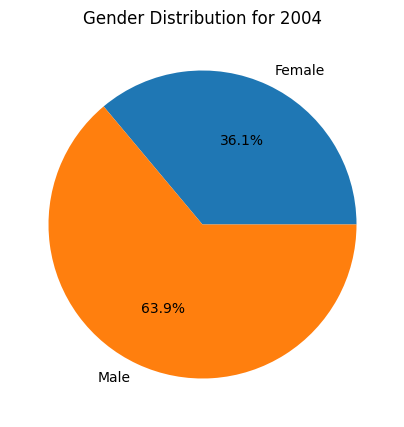

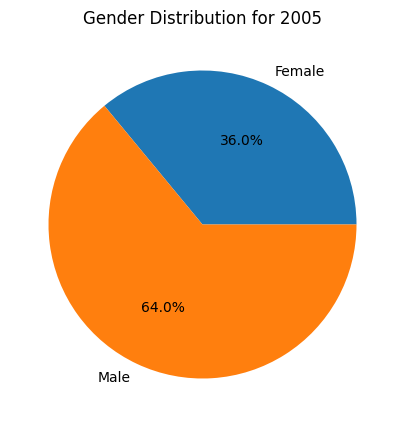

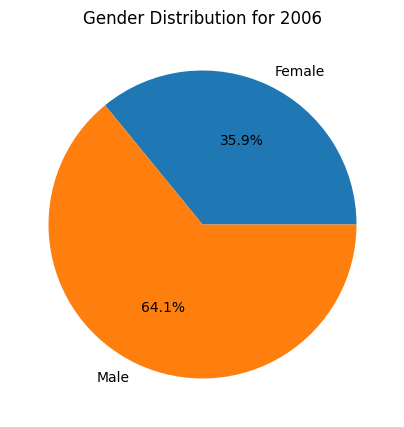

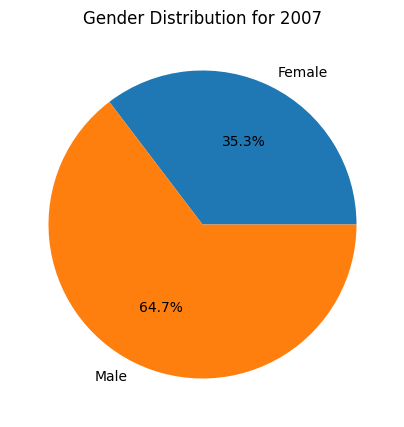

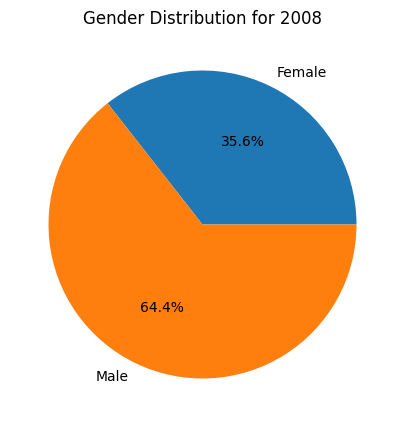

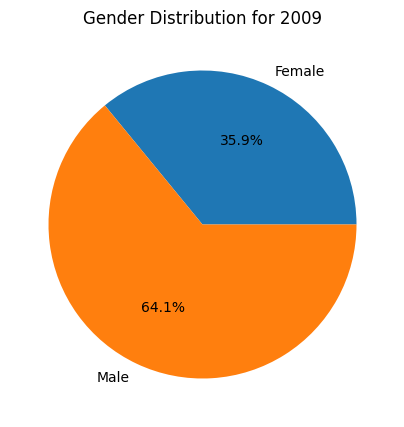

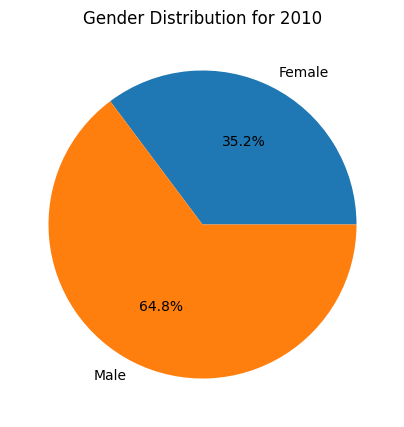

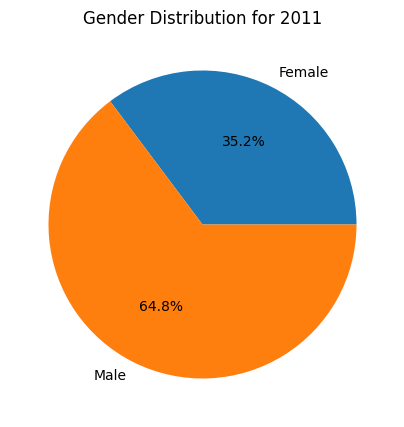

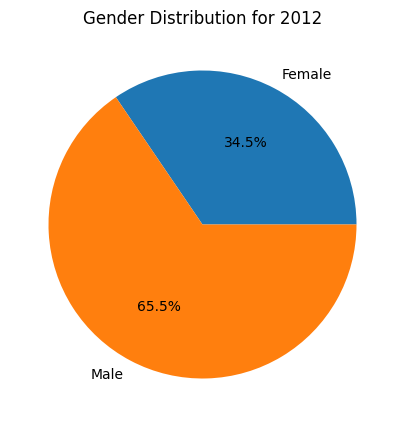

In [ ]:
for year in malefemale.index:
    # Create pie chart for the current year
    plt.figure(figsize=(5, 5))  # Adjust figure size as needed
    plt.pie(malefemale.loc[year], labels=malefemale.columns, autopct="%1.1f%%")
    plt.title(f"Gender Distribution for {year}")
    plt.show()
    plt.pause(0.5)  # Pause for 0.5 seconds before the next pie chart



Throughout the years Male suicides are more than female suicides

In Order to Find Suicides Statewise

In [ ]:
Statewise=df1.groupby(['State','Year']).sum().reset_index().pivot_table(values='Total', index='Year', columns='State', aggfunc='sum')
Statewise.drop(columns=['Total (All India)','Total (States)','Total (Uts)'], inplace=True)
bcr.bar_chart_race(df=Statewise,filename=None,figsize=(3,5),title='Statewise Suicides')


<ipython-input-25-7a5a9e5a40f7>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



West Bengal, Maharashtra and Andhra Pradesh has most number of Suicide, Lakshwadeep, Daman & Diu, Nagaland have low suicides

**Most Common Ways of Committing Suicide**

In [ ]:
bytype=df1.groupby(['Year','Type']).sum().reset_index().pivot_table(values='Total', index='Year', columns='Type', aggfunc='sum')
bytype.fillna(0)
reasons=bytype[["By Consuming Insecticides", "By Consuming Other Poison", "By Drowning", "By Fire-Arms", "By Fire/Self Immolation", "By Hanging", "By Jumping from (Building)", "By Jumping from (Other sites)", "By Jumping off Moving Vehicles/Trains", "By Machine", "By Other means", "By Other means (please specify)", "By Over Alcoholism", "By Overdose of sleeping pills", "By Self Infliction of injury", "By coming under running vehicles/trains", "By touching electric wires", "Causes Not known", "Drug Abuse/Addiction"]]
bcr.bar_chart_race(df=reasons,filename=None,figsize=(3,5),title='Suicide Reasons')


<ipython-input-24-6edf5834cda9>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



Hanging and Insecticide Consumption are the most common way of committing suides and Self Infliction and by Machine are least common ways.

In Order to Find out the age groups with the most and least suicides

In [ ]:
suicides_by_age = df1.groupby(['Year', 'Age_group']).sum().reset_index().pivot_table(values='Total', index='Year', columns='Age_group', aggfunc='sum')
suicides_by_age.drop(columns=['0-100+'], inplace=True)
bcr.bar_chart_race(df=suicides_by_age,filename=None,figsize=(3,5),title='Age-group Suicides')


<ipython-input-26-5445f8a8f6d4>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



15-29 years category have the most suicides, followed by 30-44 and least suicides are of the age 0-14

In [ ]:
ave_states=df1.groupby(['State']).sum().reset_index()
ave_states


<ipython-input-27-a56b3d5a8853>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,State,Year,Total
0,A & N Islands,13467646,8109
1,Andhra Pradesh,13626140,814059
2,Arunachal Pradesh,13457686,6633
3,Assam,13616124,172276
4,Bihar,13624142,46214
5,Chandigarh,13477631,5164
6,Chhattisgarh,13624137,302354
7,D & N Haveli,13451588,3430
8,Daman & Diu,13463643,1391
9,Delhi (Ut),13608083,84272


In [ ]:
ave_states['Literacy rate'] = [86.27, 66.4, 66.95, 85.9, 70.9, 81.38, 77.3, 65.93, 79.59, 82.4, 81.84, 74.8, 71.3, 80.5, 68, 64.7, 70.5, 95.2, 88.25, 65.5, 78.4, 73.17, 73.78, 89.4, 76.69, 70.3, 81.22, 78.5, 57.6, 76.43, 77.9, 83.15,0,0,0, 63.4, 80.7, 76.1]
ave_states['Percapita income'] =[197275.00, 163746.00, 190212.00, 90482.00, 43605.00, 291194.00, 104788.00, 120000.00, 104788.00, 331112.00, 431351.00, 212821.00, 229065.00, 183333.00, 102803.00, 71071.00, 221310.00, 194322.00, 60000.00, 103654.00, 183704.00, 79797.00, 84638.00, 187838.00, 126452.00, 102166.00, 203178.00, 149193.00, 115122.00, 412754.00, 212174.00,0,0,0,70792.00, 61374.00, 184002.00, 106510.00]

ave_states['Total'] = ave_states['Total'].astype(float)
ave_states['Literacy rate'] = ave_states['Literacy rate'].astype(float)
ave_states['Percapita income'] = ave_states['Percapita income'].astype(float)

ave_states

,State,Year,Total,Literacy rate,Percapita income
0,A & N Islands,13467646,8109.0,86.27,197275.0
1,Andhra Pradesh,13626140,814059.0,66.40,163746.0
2,Arunachal Pradesh,13457686,6633.0,66.95,190212.0
3,Assam,13616124,172276.0,85.90,90482.0
4,Bihar,13624142,46214.0,70.90,43605.0
5,Chandigarh,13477631,5164.0,81.38,291194.0
6,Chhattisgarh,13624137,302354.0,77.30,104788.0
7,D & N Haveli,13451588,3430.0,65.93,120000.0
8,Daman & Diu,13463643,1391.0,79.59,104788.0
9,Delhi (Ut),13608083,84272.0,82.40,331112.0


**Want to Establish if Education and PerCapita Income reduces total number of suicide**

In [ ]:
# Calculate correlations
correlation = ave_states.corr()

# Create heatmap with interactive tooltips
fig = px.imshow(correlation, text_auto=True)
fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Literacy rate",
    yaxis_title="Total",
    coloraxis_colorbar=dict(title="Correlation Coefficient")
)
fig.show()

<ipython-input-29-41e6a55fecc9>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



There is relationship between per Capita income and Litercy rate but no relationship with suicides

# **Managerial Implications: **

**Government:**

Data-Driven Policy: Invest in comprehensive data analysis to understand the underlying factors behind suicide across demographics and regions. This will inform targeted policy interventions.

Mental Health Access: Expand and strengthen mental health services, ensuring accessibility and affordability for all. This could involve public-private partnerships, mobile clinics, and telehealth options.
Suicide Prevention Initiatives: Implement national suicide prevention campaigns, focusing on raising awareness, reducing stigma, and promoting help-seeking behavior. Train healthcare professionals and community leaders in identifying and responding to suicidal tendencies.

Economic Support: Address potential financial triggers through targeted economic support programs, financial literacy initiatives, and job training opportunities.

Means Restriction: Explore evidence-based strategies for restricting access to common means of suicide, such as secure storage of pesticides and household items, while ensuring safety and security in affected communities.

**Society:**

Community Support: Foster a supportive and understanding environment through community outreach programs, peer support groups, and open communication about mental health. Encourage empathy and non-judgmental support for those struggling.

Destigmatization: Challenge stigma surrounding mental health and suicide through public awareness campaigns, positive media representation, and educational programs. Encourage open conversations about mental health struggles.

Promoting Well-being: Invest in programs that promote healthy lifestyles, social connection, and resilience. This could include physical activity initiatives, mindfulness training, and life skills workshops.

Education: Integrate mental health education into school curriculums to equip young people with coping mechanisms, emotional awareness, and help-seeking skills.

Media Responsibility: Encourage responsible media coverage of suicide, avoiding sensationalism and focusing on factual information and resources for help.

**Businesses:**

Employee Mental Health: Prioritize employee well-being by offering mental health benefits, confidential counseling services, and flexible work arrangements. Train managers to recognize signs of distress and provide support.

Workplace Culture: Foster a positive and supportive work environment that emphasizes open communication, stress reduction, and work-life balance. Encourage healthy relationships and teamwork.

Corporate Social Responsibility: Partner with mental health organizations and community initiatives to support suicide prevention efforts and raise awareness within the business community.
Employee Training: Train employees on identifying potential signs of distress in colleagues and how to offer support and encourage help-seeking behavior.

Promoting Well-being: Encourage healthy habits within the workplace through wellness programs, physical activity initiatives, and access to healthy food options.

